In [3]:
using Images
using Flux

In [4]:
z_dim = 2
x_dim = 512
y_dim = 512
N = 14
hidden = 9
batch_size = 1024
n = x_dim * y_dim

262144

## cast 0:x-1 to -0.5:0.5

In [2]:

cast(x) = [range(-0.5, stop=0.5, step=1/(x - 1))...]

cast (generic function with 1 method)

In [5]:
xs, ys = cast(x_dim), cast(y_dim)
xs = repeat(xs, inner=(y_dim))
ys = repeat(ys, outer=(x_dim))
rs = sqrt.(xs.^2 + ys.^2)

262144-element Array{Float64,1}:
 0.7071067811865476
 0.7057243672141199
 0.7043446771602189
 0.702967727063262
 0.7015935330555991
 0.7002221113638016
 0.6988534783089481
 0.6974876503069023
 0.6961246438685855
 0.6947644756002421
 0.6934071622036989
 0.6920527204766176
 0.6907011673127395
 ⋮
 0.6920527204766176
 0.6934071622036989
 0.6947644756002421
 0.6961246438685855
 0.6974876503069023
 0.6988534783089481
 0.7002221113638016
 0.7015935330555991
 0.702967727063262
 0.7043446771602189
 0.7057243672141199
 0.7071067811865476

In [45]:
unit(in=N, out=N, f=tanh) = Dense(in, out, f, initW=randn)

unit (generic function with 4 methods)

In [46]:
layers = Any[unit(3 + z_dim), [unit() for _ in 1:hidden]..., unit(N, 1, σ)]

11-element Array{Any,1}:
 Dense(5, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 14, tanh)
 Dense(14, 1, σ)

- In essence, CPPN is just a function, c = f(x, y), that defines the intensity of the image for every point in space.

In [47]:
model = Chain(layers...)
getColorAt(x) = Flux.data(model(x))

getColorAt (generic function with 1 method)

## Make batches from the data

In [48]:
function batch(arr, s)
    l = size(arr, 2)
    batches = [arr[:, i:min(i+s-1, l)] for i=1:s:l]
    batches
end

batch (generic function with 1 method)

## Create image with intensities

In [49]:
function getImage(z)
    z = repeat(reshape(z, 1, z_dim), outer=(n, 1))
    coords = hcat(xs, ys, rs, z)'
    coords = batch(coords, batch_size)
    pixels = [Gray.(hcat(getColorAt.(coords)...))...]
    reshape(pixels, y_dim, x_dim)
end

getImage (generic function with 1 method)

In [50]:
function saveImg(z, image_path="sample.png")
    imgg = getImage(z)
    save(image_path, imgg)
    imgg
end

saveImg (generic function with 2 methods)

## Will generate at random everytime

,,,,,,,,,

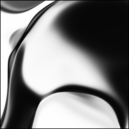
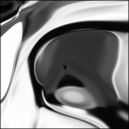
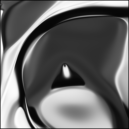
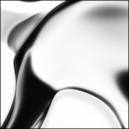
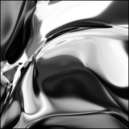
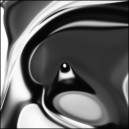
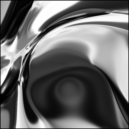
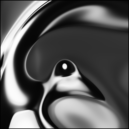
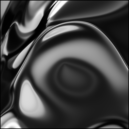
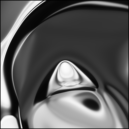

In [51]:
[saveImg(rand(z_dim)) for _ in 1:10]